## Flight Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
%matplotlib inline
df_train = pd.read_excel('Data_Train.xlsx')
df_train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
df_train[["Price"]].isnull().sum()

Price    0
dtype: int64

In [6]:
df_train["Price"] = df_train['Price'].astype('int')

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int32 
dtypes: int32(1), object(10)
memory usage: 876.5+ KB


In [8]:
df_train["Total_Stops"].isnull().sum()

1

In [9]:
df_train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [10]:
df_train["Total_Stops"] = df_train["Total_Stops"].map({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4})

In [11]:
df_train["Total_Stops"].value_counts()

1.0    5625
0.0    3491
2.0    1520
3.0      45
4.0       1
Name: Total_Stops, dtype: int64

In [12]:
df_train["Total_Stops"].isnull().sum()

1

In [13]:
df_train["Total_Stops"] = df_train["Total_Stops"].fillna(0)

In [14]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [15]:
df_train["Total_Stops"] = df_train["Total_Stops"].astype('int')

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10683 non-null  int32 
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int32 
dtypes: int32(2), object(9)
memory usage: 834.7+ KB


In [17]:
df_train["Arrival_Hr"] = df_train["Arrival_Time"].str.split(" ").str[0].str.split(":").str[0]

In [18]:
df_train["Arrival_Min"] =df_train["Arrival_Time"].str.split(" ").str[0].str.split(":").str[1]

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10683 non-null  int32 
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int32 
 11  Arrival_Hr       10683 non-null  object
 12  Arrival_Min      10683 non-null  object
dtypes: int32(2), object(11)
memory usage: 1001.7+ KB


In [20]:
df_train["Departure_Hr"] = df_train["Dep_Time"].str.split(" ").str[0].str.split(":").str[0]

In [21]:
df_train["Departure_Min"] =df_train["Dep_Time"].str.split(" ").str[0].str.split(":").str[1]

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10683 non-null  int32 
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int32 
 11  Arrival_Hr       10683 non-null  object
 12  Arrival_Min      10683 non-null  object
 13  Departure_Hr     10683 non-null  object
 14  Departure_Min    10683 non-null  object
dtypes: int32(2), object(13)
memory usage: 1.1+ MB


In [23]:
df_train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_Hr,Arrival_Min,Departure_Hr,Departure_Min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,01,10,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,13,15,05,50


In [24]:
df_train.drop(["Arrival_Time","Dep_Time"],axis=1,inplace=True)

In [25]:
df_train["Arrival_Hr"] = df_train["Arrival_Hr"].astype('int')
df_train["Arrival_Min"] = df_train["Arrival_Min"].astype('int')
df_train["Departure_Hr"] = df_train["Departure_Hr"].astype('int')
df_train["Departure_Min"] = df_train["Departure_Min"].astype('int')


In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10683 non-null  int32 
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int32 
 9   Arrival_Hr       10683 non-null  int32 
 10  Arrival_Min      10683 non-null  int32 
 11  Departure_Hr     10683 non-null  int32 
 12  Departure_Min    10683 non-null  int32 
dtypes: int32(6), object(7)
memory usage: 834.7+ KB


In [27]:
df_train["Duration"].head()

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

In [28]:
df_train["Duration"].isnull().sum()

0

In [29]:
df_train["Duration_Hr"]=df_train["Duration"].str.split(" ").str[0].str.split("h").str[0]

In [30]:
df_train["Duration_Min"]=df_train["Duration"].str.split(" ").str[1].str.split("h").str[0].str.split('m').str[0]

In [31]:
df_train[df_train["Duration_Hr"]=='5m']

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Arrival_Hr,Arrival_Min,Departure_Hr,Departure_Min,Duration_Hr,Duration_Min
6474,Air India,6/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2,No info,17327,16,55,16,50,5m,NaN


In [32]:
df_train.drop(6474,axis=0,inplace=True)

In [33]:
df_train["Duration_Hr"]=df_train["Duration_Hr"].astype('int')

In [34]:
df_train['Duration_Min'].replace(np.nan,0,inplace=True)

In [35]:
df_train["Duration_Min"].isnull().sum()

0

In [36]:
df_train["Duration_Min"] = df_train["Duration_Min"].astype('int')

In [37]:
df_train["Total_Duration (in Mins)"] = df_train["Duration_Hr"]*60 + df_train["Duration_Min"]

In [38]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Airline                   10682 non-null  object
 1   Date_of_Journey           10682 non-null  object
 2   Source                    10682 non-null  object
 3   Destination               10682 non-null  object
 4   Route                     10681 non-null  object
 5   Duration                  10682 non-null  object
 6   Total_Stops               10682 non-null  int32 
 7   Additional_Info           10682 non-null  object
 8   Price                     10682 non-null  int32 
 9   Arrival_Hr                10682 non-null  int32 
 10  Arrival_Min               10682 non-null  int32 
 11  Departure_Hr              10682 non-null  int32 
 12  Departure_Min             10682 non-null  int32 
 13  Duration_Hr               10682 non-null  int32 
 14  Duration_Min          

In [39]:
df_train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Arrival_Hr,Arrival_Min,Departure_Hr,Departure_Min,Duration_Hr,Duration_Min,Total_Duration (in Mins)
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,1,10,22,20,2,50,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,13,15,5,50,7,25,445


In [40]:
df_train.drop(["Duration","Duration_Hr","Duration_Min"],axis=1,inplace=True)

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Airline                   10682 non-null  object
 1   Date_of_Journey           10682 non-null  object
 2   Source                    10682 non-null  object
 3   Destination               10682 non-null  object
 4   Route                     10681 non-null  object
 5   Total_Stops               10682 non-null  int32 
 6   Additional_Info           10682 non-null  object
 7   Price                     10682 non-null  int32 
 8   Arrival_Hr                10682 non-null  int32 
 9   Arrival_Min               10682 non-null  int32 
 10  Departure_Hr              10682 non-null  int32 
 11  Departure_Min             10682 non-null  int32 
 12  Total_Duration (in Mins)  10682 non-null  int32 
dtypes: int32(7), object(6)
memory usage: 876.3+ KB


In [42]:
df_train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Arrival_Hr,Arrival_Min,Departure_Hr,Departure_Min,Total_Duration (in Mins)
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,0,No info,3897,1,10,22,20,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,13,15,5,50,445


In [43]:
df_train.drop('Route',axis=1,inplace=True)

In [44]:
df_train.head(2)

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Additional_Info,Price,Arrival_Hr,Arrival_Min,Departure_Hr,Departure_Min,Total_Duration (in Mins)
0,IndiGo,24/03/2019,Banglore,New Delhi,0,No info,3897,1,10,22,20,170
1,Air India,1/05/2019,Kolkata,Banglore,2,No info,7662,13,15,5,50,445


In [45]:
df_train["Date"] = df_train["Date_of_Journey"].str.split("/").str[0]
df_train["Month"] = df_train["Date_of_Journey"].str.split("/").str[1]
df_train["year"] = df_train["Date_of_Journey"].str.split("/").str[2]

In [46]:
df_train.head(2)

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Additional_Info,Price,Arrival_Hr,Arrival_Min,Departure_Hr,Departure_Min,Total_Duration (in Mins),Date,Month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,0,No info,3897,1,10,22,20,170,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,2,No info,7662,13,15,5,50,445,1,05,2019


In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Airline                   10682 non-null  object
 1   Date_of_Journey           10682 non-null  object
 2   Source                    10682 non-null  object
 3   Destination               10682 non-null  object
 4   Total_Stops               10682 non-null  int32 
 5   Additional_Info           10682 non-null  object
 6   Price                     10682 non-null  int32 
 7   Arrival_Hr                10682 non-null  int32 
 8   Arrival_Min               10682 non-null  int32 
 9   Departure_Hr              10682 non-null  int32 
 10  Departure_Min             10682 non-null  int32 
 11  Total_Duration (in Mins)  10682 non-null  int32 
 12  Date                      10682 non-null  object
 13  Month                     10682 non-null  object
 14  year                  

In [48]:
df_train["Date"] = df_train["Date"].astype('int')
df_train["Month"] = df_train["Month"].astype('int')
df_train["year"] = df_train["year"].astype('int')

In [49]:
df_train.head(2)

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Additional_Info,Price,Arrival_Hr,Arrival_Min,Departure_Hr,Departure_Min,Total_Duration (in Mins),Date,Month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,0,No info,3897,1,10,22,20,170,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,2,No info,7662,13,15,5,50,445,1,5,2019


In [50]:
df_train.drop(["Date_of_Journey"],axis=1,inplace=True)

In [51]:
df_train.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Arrival_Hr,Arrival_Min,Departure_Hr,Departure_Min,Total_Duration (in Mins),Date,Month,year
0,IndiGo,Banglore,New Delhi,0,No info,3897,1,10,22,20,170,24,3,2019
1,Air India,Kolkata,Banglore,2,No info,7662,13,15,5,50,445,1,5,2019


In [52]:
df_train.shape

(10682, 14)

In [53]:
df_train.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Arrival_Hr', 'Arrival_Min', 'Departure_Hr', 'Departure_Min',
       'Total_Duration (in Mins)', 'Date', 'Month', 'year'],
      dtype='object')

In [54]:
for col in df_train.columns:
    print(col,':',len(df_train[col].unique()),'unique values')

Airline : 12 unique values
Source : 5 unique values
Destination : 6 unique values
Total_Stops : 5 unique values
Additional_Info : 10 unique values
Price : 1870 unique values
Arrival_Hr : 24 unique values
Arrival_Min : 12 unique values
Departure_Hr : 24 unique values
Departure_Min : 12 unique values
Total_Duration (in Mins) : 367 unique values
Date : 10 unique values
Month : 4 unique values
year : 1 unique values


In [55]:
## Top 7 most common airlines
df_train[["Airline"]].value_counts().sort_values(ascending=False).head(7)

Airline          
Jet Airways          3849
IndiGo               2053
Air India            1751
Multiple carriers    1196
SpiceJet              818
Vistara               479
Air Asia              319
dtype: int64

In [56]:
df_train[["Source"]].value_counts().sort_values(ascending=False).head()

Source  
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
dtype: int64

In [57]:
df_train[["Destination"]].value_counts().sort_values(ascending=False).head(6)

Destination
Cochin         4537
Banglore       2871
Delhi          1265
New Delhi       932
Hyderabad       696
Kolkata         381
dtype: int64

In [58]:
top_7_airline = [x for x in df_train["Airline"].value_counts().sort_values(ascending=False).head(7).index]
top_7_airline

['Jet Airways',
 'IndiGo',
 'Air India',
 'Multiple carriers',
 'SpiceJet',
 'Vistara',
 'Air Asia']

In [59]:
top_7_source = [x for x in df_train["Source"].value_counts().sort_values(ascending=False).head(7).index]
top_7_source

['Delhi', 'Kolkata', 'Banglore', 'Mumbai', 'Chennai']

In [60]:
top_7_destination = [x for x in df_train["Destination"].value_counts().sort_values(ascending=False).head(7).index]
top_7_destination

['Cochin', 'Banglore', 'Delhi', 'New Delhi', 'Hyderabad', 'Kolkata']

In [61]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Arrival_Hr,Arrival_Min,Departure_Hr,Departure_Min,Total_Duration (in Mins),Date,Month,year
0,IndiGo,Banglore,New Delhi,0,No info,3897,1,10,22,20,170,24,3,2019
1,Air India,Kolkata,Banglore,2,No info,7662,13,15,5,50,445,1,5,2019
2,Jet Airways,Delhi,Cochin,2,No info,13882,4,25,9,25,1140,9,6,2019
3,IndiGo,Kolkata,Banglore,1,No info,6218,23,30,18,5,325,12,5,2019
4,IndiGo,Banglore,New Delhi,1,No info,13302,21,35,16,50,285,1,3,2019


In [62]:
df_train.shape

(10682, 14)

In [63]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Arrival_Hr,Arrival_Min,Departure_Hr,Departure_Min,Total_Duration (in Mins),Date,Month,year
0,IndiGo,Banglore,New Delhi,0,No info,3897,1,10,22,20,170,24,3,2019
1,Air India,Kolkata,Banglore,2,No info,7662,13,15,5,50,445,1,5,2019
2,Jet Airways,Delhi,Cochin,2,No info,13882,4,25,9,25,1140,9,6,2019
3,IndiGo,Kolkata,Banglore,1,No info,6218,23,30,18,5,325,12,5,2019
4,IndiGo,Banglore,New Delhi,1,No info,13302,21,35,16,50,285,1,3,2019


In [64]:
df_train.isnull().sum()

Airline                     0
Source                      0
Destination                 0
Total_Stops                 0
Additional_Info             0
Price                       0
Arrival_Hr                  0
Arrival_Min                 0
Departure_Hr                0
Departure_Min               0
Total_Duration (in Mins)    0
Date                        0
Month                       0
year                        0
dtype: int64

In [65]:
df_train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [66]:
df_train = df_train[df_train.Airline != 'Multiple carriers Premium economy']
df_train = df_train[df_train.Airline != 'Jet Airways Business']
df_train = df_train[df_train.Airline != 'Vistara Premium economy']
df_train = df_train[df_train.Airline != 'Trujet']

In [67]:
df_train["Airline"] = df_train["Airline"].map({"Jet Airways":1,"IndiGo":2,"Air India":3,"Multiple carriers":4,"SpiceJet":5,"Vistara":6,"Air Asia":7,"GoAir":8})

In [68]:
df_train["Airline"].isnull().sum()

0

In [69]:
df_train["Source"] = df_train["Source"].map({"Delhi":1,"Kolkata":2,"Banglore":3,"Mumbai":4,"Chennai":5})

In [70]:
df_train["Destination"] = df_train["Destination"].map({"Cochin":1,"Banglore":2,"Delhi":3,"New Delhi":4,"Hyderabad":5,"Kolkata":6})

In [71]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Arrival_Hr,Arrival_Min,Departure_Hr,Departure_Min,Total_Duration (in Mins),Date,Month,year
0,2,3,4,0,No info,3897,1,10,22,20,170,24,3,2019
1,3,2,2,2,No info,7662,13,15,5,50,445,1,5,2019
2,1,1,1,2,No info,13882,4,25,9,25,1140,9,6,2019
3,2,2,2,1,No info,6218,23,30,18,5,325,12,5,2019
4,2,3,4,1,No info,13302,21,35,16,50,285,1,3,2019


In [72]:
df_train = df_train.drop(["Additional_Info"],axis=1)

In [73]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Arrival_Hr,Arrival_Min,Departure_Hr,Departure_Min,Total_Duration (in Mins),Date,Month,year
0,2,3,4,0,3897,1,10,22,20,170,24,3,2019
1,3,2,2,2,7662,13,15,5,50,445,1,5,2019
2,1,1,1,2,13882,4,25,9,25,1140,9,6,2019
3,2,2,2,1,6218,23,30,18,5,325,12,5,2019
4,2,3,4,1,13302,21,35,16,50,285,1,3,2019


In [74]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10659 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Airline                   10659 non-null  int64
 1   Source                    10659 non-null  int64
 2   Destination               10659 non-null  int64
 3   Total_Stops               10659 non-null  int32
 4   Price                     10659 non-null  int32
 5   Arrival_Hr                10659 non-null  int32
 6   Arrival_Min               10659 non-null  int32
 7   Departure_Hr              10659 non-null  int32
 8   Departure_Min             10659 non-null  int32
 9   Total_Duration (in Mins)  10659 non-null  int32
 10  Date                      10659 non-null  int32
 11  Month                     10659 non-null  int32
 12  year                      10659 non-null  int32
dtypes: int32(10), int64(3)
memory usage: 749.5 KB


In [75]:
df_train.shape

(10659, 13)

In [76]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Arrival_Hr,Arrival_Min,Departure_Hr,Departure_Min,Total_Duration (in Mins),Date,Month,year
0,2,3,4,0,3897,1,10,22,20,170,24,3,2019
1,3,2,2,2,7662,13,15,5,50,445,1,5,2019
2,1,1,1,2,13882,4,25,9,25,1140,9,6,2019
3,2,2,2,1,6218,23,30,18,5,325,12,5,2019
4,2,3,4,1,13302,21,35,16,50,285,1,3,2019


### Now let us perform the EDA on the data

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

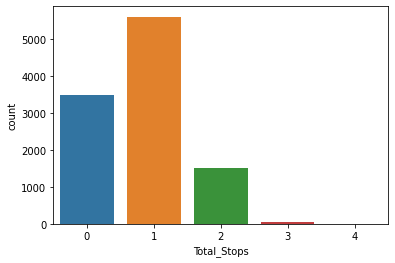

In [77]:
sns.countplot(x="Total_Stops",data=df_train)

C:\Users\Yogiraj\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Total_Duration (in Mins)', ylabel='count'>

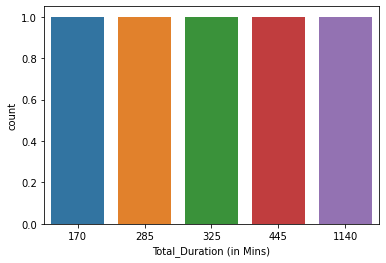

In [78]:
sns.countplot("Total_Duration (in Mins)",data=df_train[:5])

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

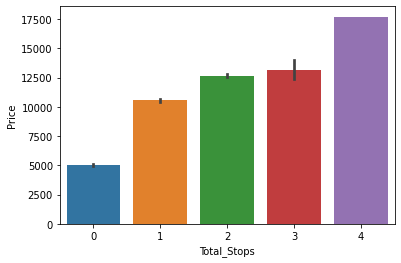

In [79]:
sns.barplot(x="Total_Stops",y="Price",data=df_train)

<AxesSubplot:xlabel='Total_Duration (in Mins)', ylabel='Price'>

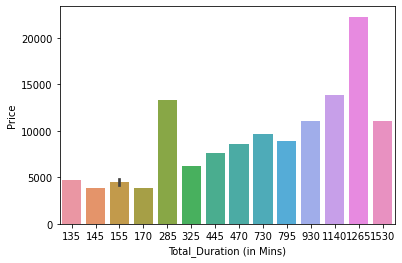

In [80]:
sns.barplot(x="Total_Duration (in Mins)",y="Price",data=df_train[:15])

### Find the correlation

In [81]:
df = df_train[["Price","Total_Stops","Total_Duration (in Mins)"]]

<AxesSubplot:>

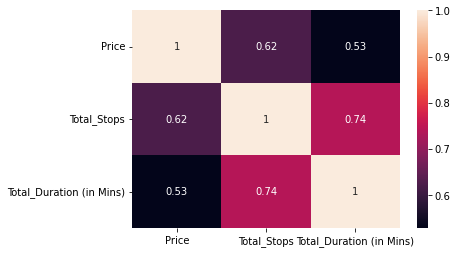

In [82]:
sns.heatmap(df.corr(),annot=True)

## Observation
As we can see there is a strong positive correlation between the price and the total number of stops and the total duration of the flight.

In [83]:
df1 = df_train[["Price","Date","Month"]]

<AxesSubplot:>

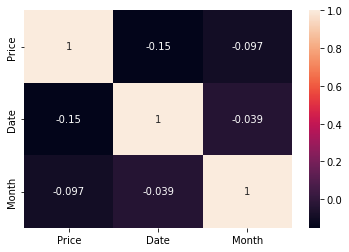

In [84]:
sns.heatmap(df1.corr(),annot=True)

<AxesSubplot:>

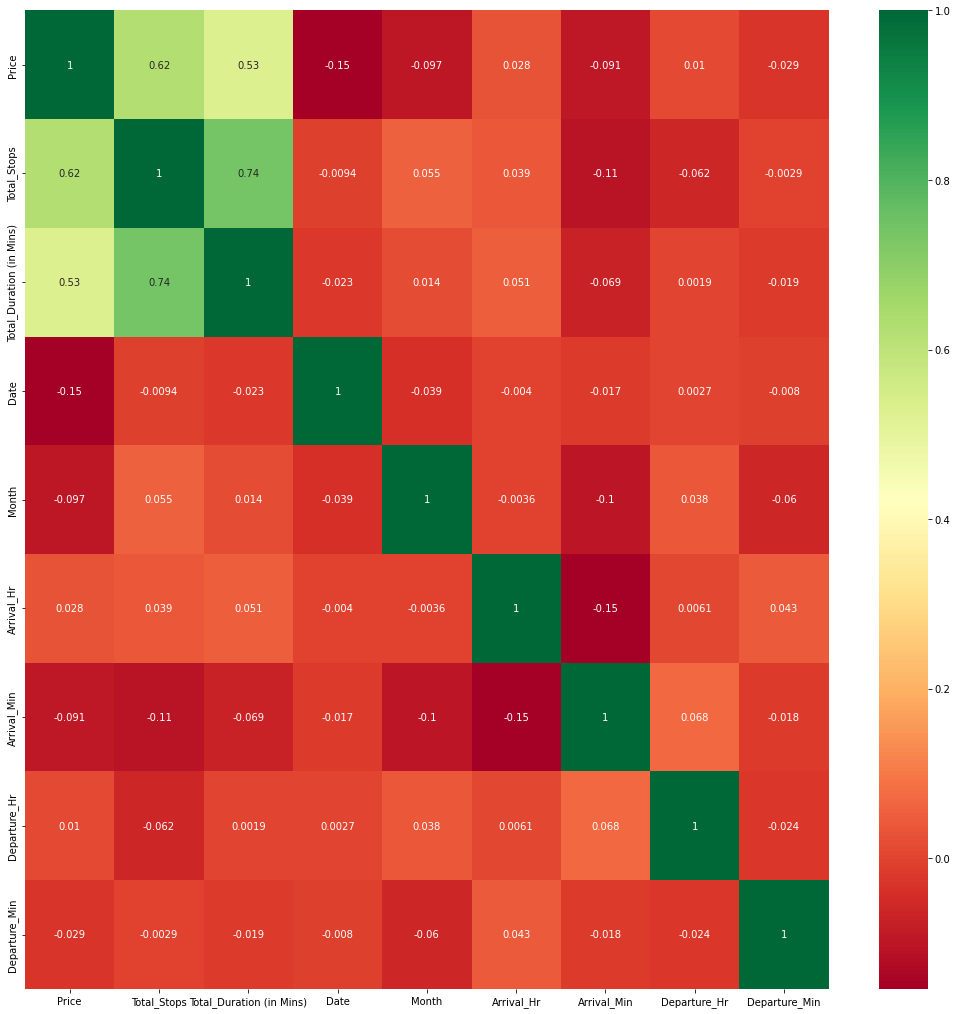

In [85]:
df2 = df_train[["Price","Total_Stops","Total_Duration (in Mins)","Date","Month","Arrival_Hr","Arrival_Min","Departure_Hr","Departure_Min"]]
plt.figure(figsize = (18,18))
sns.heatmap(df2.corr(),annot=True,cmap='RdYlGn')

In [86]:
X = df_train.drop(["Price"],axis=1)

In [87]:
X.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Arrival_Hr',
       'Arrival_Min', 'Departure_Hr', 'Departure_Min',
       'Total_Duration (in Mins)', 'Date', 'Month', 'year'],
      dtype='object')

In [88]:
y = df_train["Price"]

In [89]:
X.head()

,Airline,Source,Destination,Total_Stops,Arrival_Hr,Arrival_Min,Departure_Hr,Departure_Min,Total_Duration (in Mins),Date,Month,year
0,2,3,4,0,1,10,22,20,170,24,3,2019
1,3,2,2,2,13,15,5,50,445,1,5,2019
2,1,1,1,2,4,25,9,25,1140,9,6,2019
3,2,2,2,1,23,30,18,5,325,12,5,2019
4,2,3,4,1,21,35,16,50,285,1,3,2019


In [90]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int32

In [91]:
from sklearn.ensemble import ExtraTreesRegressor
imp = ExtraTreesRegressor(n_estimators=50,random_state=0)
imp.fit(X,y)

ExtraTreesRegressor(n_estimators=50, random_state=0)

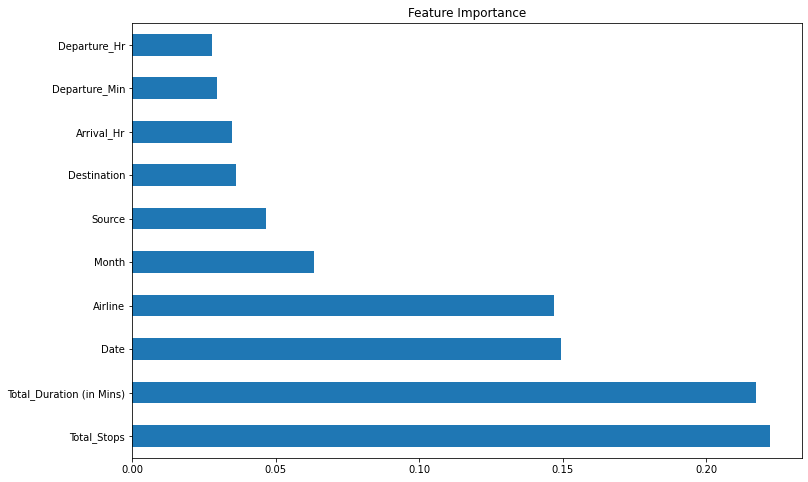

In [92]:
plt.figure(figsize=(12,8))
plt.title("Feature Importance")
feat_importances = pd.Series(imp.feature_importances_,index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [93]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50,random_state=0)

In [101]:
### Using stratified k-fold cross validation for model evaluation

from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=None)
R_squared=[]

for train_index,test_index in kf.split(X,y):
    print("Train: ",train_index,"Test: ",test_index)
    X_train, X_test = X.iloc[train_index].values, X.iloc[test_index].values
    y_train, y_test = y.iloc[train_index].values, y.iloc[test_index].values
    
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    score=r2_score(y_test,y_pred)
    R_squared.append(score)

print(R_squared)
print("R-squared:",np.mean(R_squared))

C:\Users\Yogiraj\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Train:  [    1     2     3 ... 10656 10657 10658] Test:  [    0     9    10 ... 10641 10643 10653]
Train:  [    0     1     3 ... 10656 10657 10658] Test:  [    2     5     7 ... 10640 10652 10654]
Train:  [    0     1     2 ... 10655 10656 10657] Test:  [    6     8    13 ... 10650 10651 10658]
Train:  [    0     1     2 ... 10654 10656 10658] Test:  [   17    19    20 ... 10649 10655 10657]
Train:  [    0     2     5 ... 10655 10657 10658] Test:  [    1     3     4 ... 10644 10648 10656]
[0.8160592162816016, 0.8163529026271648, 0.8339288621274678, 0.820311543972585, 0.8040482916920746]
R-squared: 0.8181401633401787


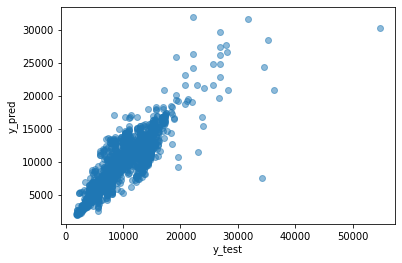

In [102]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [103]:
X_new = X.sample(10000,random_state=99)
X_new

,Airline,Source,Destination,Total_Stops,Arrival_Hr,Arrival_Min,Departure_Hr,Departure_Min,Total_Duration (in Mins),Date,Month,year
5748,2,1,1,1,21,0,4,55,965,27,5,2019
5187,2,3,3,0,11,20,8,30,170,12,4,2019
4594,2,3,3,0,19,55,16,55,180,6,4,2019
365,3,1,1,1,6,50,5,15,1535,15,5,2019
7959,1,1,1,1,4,25,22,50,335,1,6,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
5504,4,1,1,1,1,30,18,0,450,27,5,2019
6602,1,1,1,2,19,0,11,40,440,27,6,2019
632,7,2,2,1,10,40,22,40,720,6,6,2019
6134,1,1,1,1,12,35,15,0,1295,24,6,2019


In [104]:
y_new = y.sample(10000,random_state=99)
y_new

5748     8784
5187     4823
4594     4823
365      8425
7959    10262
        ...  
5504     7198
6602    18804
632      6810
6134    10262
4743     8330
Name: Price, Length: 10000, dtype: int32

In [105]:
import pickle as pkl
pkl.dump(rf, open('flight.pkl','wb'))

In [106]:
pkl.load(open('flight.pkl','rb'))

RandomForestRegressor(n_estimators=50, random_state=0)